In [122]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

### Loading and cleaning initial CSV

In [120]:
genres = pd.read_csv("genres_v2.csv")

/var/folders/y3/f9twdr796bj91_x22w2_mf2h0000gn/T/ipykernel_10048/90249429.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  genres = pd.read_csv("genres_v2.csv")


In [121]:
genres.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [98]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [99]:
genres.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [125]:
genres.dropna(subset=['song_name'], inplace=True)

In [126]:
genres = genres.drop(columns=['Unnamed: 0'])

In [127]:
genres.shape

(21519, 21)

### Looking at distribution of genres and duration

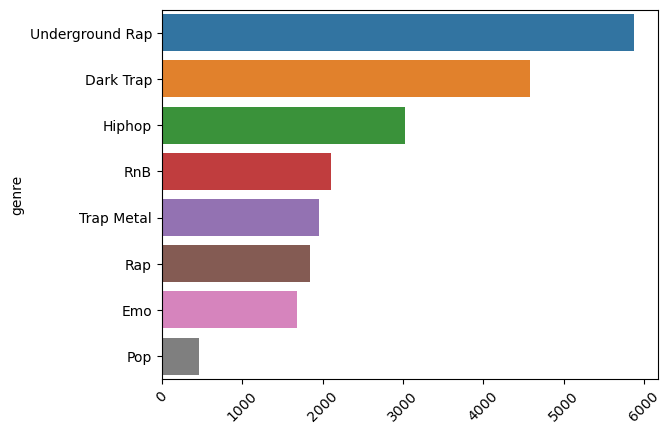

In [128]:
# Checking for 
sns.barplot(data=genres, y=genres.genre.value_counts().index, x=genres.genre.value_counts().values)
plt.xticks(rotation=45)
plt.show()

/Users/HenrySoysa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


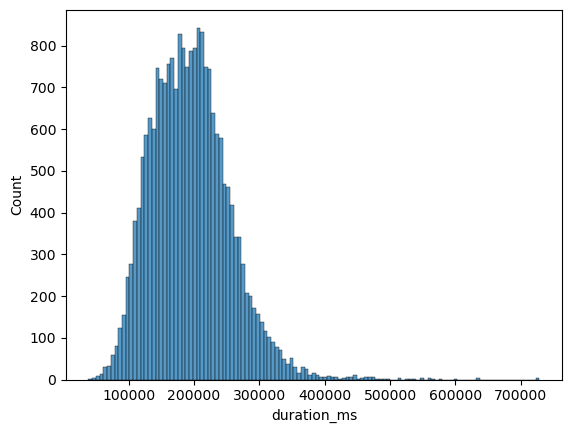

In [129]:
sns.histplot(data=genres, x='duration_ms')
plt.show()

---
In order to make the not-hot songs database as heterogenouous as possible in terms of genre, will look to improve the overall distribution of songs per genre to be a uniform distribution.

In [113]:
# Determine the count of each genre in the original DataFrame
genre_counts = genres['genre'].value_counts()

# Set a desired sample size for each genre (e.g., 10 songs per genre)
desired_sample_size = int(3000/len(genres['genre'].value_counts().index))
print(desired_sample_size)

# Initialize an empty DataFrame for the sampled data
sampled_df = pd.DataFrame()

# Iterate through each genre, sample songs, and concatenate to the sampled_df
for genre, count in genre_counts.items():
    if count >= desired_sample_size:
        # If the genre has enough songs, sample the desired number
        sampled_genre = genres[genres['genre'] == genre].sample(desired_sample_size, random_state=42)
    else:
        # If the genre has fewer songs than desired_sample_size, include all available
        sampled_genre = genres[genres['genre'] == genre]

    sampled_df = pd.concat([sampled_df, sampled_genre])

# Reset the index of the sampled DataFrame
sampled_df = sampled_df.reset_index(drop=True)

# Now, sampled_df contains a more uniform distribution of genres

375


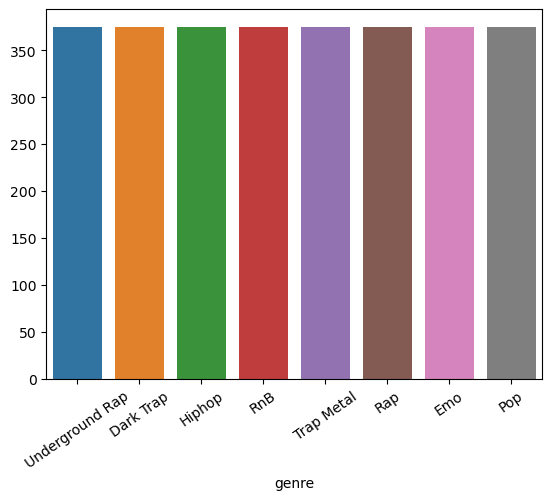

In [130]:
# Checking distribution of genres after the sampling of the original dataframe. 

sns.barplot(data=sampled_df, x=sampled_df.genre.value_counts().index, y=sampled_df.genre.value_counts().values)
plt.xticks(rotation=35)
plt.show()

/Users/HenrySoysa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


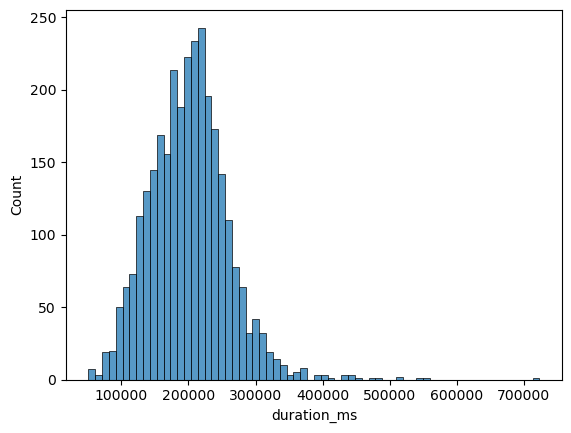

In [131]:
# Checking the distribution of duration after sampling
sns.histplot(data=sampled_df, x='duration_ms')
plt.show()

---
## Importing hot songs file for comparison and cleaning of not-hot songs

In [146]:
def scrape_hot100(file_path="./top_100_songs.csv"):
    """
    Inputs: file path to save csv of top 100 songs to
    Outputs: csv of top 100 songs
    Function: This function will scrape the current top 100 songs from the billboards with artist, rank and title
    and save them to a CSV which will then be saved locally on the directory where this function is run. 
    """
    # Define URL
    url = "https://www.billboard.com/charts/hot-100"

    # sending request to url
    response = requests.get(url)
    # Checking response status code
    print(response.status_code)
    

    # Defining soup after parsing for html
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # saving soup of top 100 songs table
    table = soup.find("div", {"class":"chart-results-list"})
    
    # Retrieving name of songs
    titles = [elem.get_text().replace('\n', '').replace('\t', '') for elem in table.select("div ul li ul li h3")]
    
    # Retrieving artists
    artists = [elem.get_text().replace('\n', '').replace('\t','') for elem in table.select("div ul li ul li span.a-no-trucate")]
    
    ranks = list(range(1,101))
    
    df = pd.DataFrame({"Title":titles, "Artist":artists, "Rank":ranks})
    
    df.to_csv(file_path, index=False)
    
    print("success")

In [147]:
scrape_hot100()
!ls

200
success
README.md                  playlists.csv
genres_v2.csv              top_100_songs.csv
not_hot_100_songs_db.ipynb


In [152]:
df_hot = pd.read_csv("top_100_songs.csv")
df_hot = df_hot.rename(columns={'Title':'song_name'})
df_hot.head()

,song_name,Artist,Rank
0,Rockin' Around The Christmas Tree,Brenda Lee,1
1,All I Want For Christmas Is You,Mariah Carey,2
2,Jingle Bell Rock,Bobby Helms,3
3,Last Christmas,Wham!,4
4,A Holly Jolly Christmas,Burl Ives,5


In [154]:
def convert_to_lower(x):
    '''
    Converts a string to lowercase
    '''
    if isinstance(x, str):
        return x.lower()
    else:
        return x

genres['song_name'] = genres['song_name'].apply(convert_to_lower)

df_hot['song_name'] = df_hot['song_name'].apply(convert_to_lower)


The following code has been commented out as the song titles are not completely unique and require artist next to them in order to truly identify duplicates within hot_songs and not_hot_songs, otherwise songs that are not actually in the hot songs will be removed from the not hot songs due to the songs simply having the same names. 


In [155]:
# removing the songs in the dataframe that are present in the billboard100

"""rows_to_remove = genres[genres['song_name'].isin(df_hot['song_title'])].index

df_not_hot = genres.drop(rows_to_remove, axis=0)"""

"rows_to_remove = genres[genres['song_name'].isin(df_hot['song_title'])].index\n\ndf_not_hot = genres.drop(rows_to_remove, axis=0)"

In [157]:
# Checking what song names from not hot df are present in the hot songs. 

# Conclusion: need to get artist for song in not-hot df in order to truly remove the true duplicates from the not-hot song df

shared_song_names = genres[genres['song_name'].isin(df_hot['song_name'])]['song_name'].tolist()
shared_song_names

['houdini',
 'idgaf',
 'water',
 'water',
 'last night',
 'everybody',
 'idgaf',
 'water',
 'water',
 'everybody',
 'burn it down',
 'strangers',
 'everybody',
 'water',
 'idgaf',
 'water']